In [ ]:
import os
import opendatasets as od
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
import random # for data visualization
import matplotlib.pyplot as plt # for data visualization

## Before we start!
### Some important points we have to consider:
1. The **licence of this dataset**: CC BY-NC-SA 4.0

    - That means:

        *Data Usage:*

            **Data can be used for research and/or commercial purposes by citing to the original paper below.**
            
2. Paper that **must** be considered when citing: https://arxiv.org/abs/2203.03859

#### Also, when reading the paper, some important details need to be further considered:
1. The data is stored in *27 different classes*, which includes a **NULL class** (it is to also train an eventual model in learning when there is no signal present in the image).
2. The data is stored in a file of format .npy, which in summary, stores the values of each pixel of each image in a numerical fashion.
3. All the images are stored in a **unique size 128x128x3** (the 3 referring to the color channel), so the rezising does not need to be considered.
4. The color channel is already set to work with python standards, that is, RGB (this can be checked by altering the order of the channels, which will be made as well).
5. There is no mention in the paper whatsoever of the original format of the images considered, and in the .npy there is no .json incorporated with metadata with such purpose. Moreover, it is stated in the paper that the pixel values was divided by 255 and stored as 32-bit, which already tells us that there is **loss of information**, regardless of whether the images where .png, .jpg, or any other.

##### Why choose this DataSet?
1. It is not a binary classification problem, as there are 27 different categories to learn from. This might make the project more challenging.
2. Unlike previously seen projects, this has the NULL category.

In [ ]:
od.download('https://www.kaggle.com/datasets/ardamavi/27-class-sign-language-dataset/data')

Skipping, found downloaded files in "./27-class-sign-language-dataset" (use force=True to force download)


In [ ]:
for dirname, _, filenames in os.walk('27-class-sign-language-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

27-class-sign-language-dataset/X.npy
27-class-sign-language-dataset/Y.npy


In [ ]:
X = np.load('27-class-sign-language-dataset/X.npy')
y = np.load('27-class-sign-language-dataset/Y.npy')

**As stated above,** the format .npy is not the format of the images itself.
An .npy file is an optimized way of managing larges amounts of data, storing the value of the pixels, per height, width, and color channel.
As it is for storing only numerical data, it cannot store metadata itself, so these .npy files usually come together with a .json for such purpose, which is sadly not the case for us. So, in the specific case of this dataset, we do not know whether the images were already compressed lossless (i.e.: .png), or loosy (.jpg, .jpeg); or preprocessed to have the all the 128x128x3 size.

**Another difference** that make come in handy, is between .npy files and TiF. The former *can* store images (in a binary format), but the main purpose of the .npy is numerical operations with the data stored. In that sense, it can be potentially used to store images, as they are an array of numbers. The latter is in fact for image storage, and can also **store metadata**, such as resolution, color space, and compression type, format of images, etc.

**Usually,** when it comes to image classification tasks, the data comes sorted in folders for train and test. In our case, as we are going to see later, is up to us to divide into test and train sets.

**First,** we will start with *y*, as it stores the data of the labels, and it is more straightforward.

In [ ]:
y, y.shape

(array([['please'],
        ['please'],
        ['please'],
        ...,
        ['5'],
        ['5'],
        ['5']], dtype='<U17'),
 (22801, 1))

The data is stored as an ndarray of size (22801,1), given the total amount of images available (i.e. 22801), and the label.

In [ ]:
labels_df = pd.DataFrame({'label':y.reshape(-1)})
different_labels = len(set(labels_df['label']))
print(f'Amount of different labels: {different_labels}')
labels_df['Amount of Images'] = 1
labels_df.groupby(by = 'label', as_index = False).sum()

Amount of different labels: 27


,label,Amount of Images
0,0,866
1,1,865
2,2,865
3,3,865
4,4,864
5,5,865
6,6,865
7,7,865
8,8,865
9,9,865


The category for which we have the least amount of data is the NULL category.

In [ ]:
grouped_df = labels_df.groupby(by = 'label', as_index = False).sum()
amount_comparison = grouped_df[grouped_df['label'] == 'NULL'].values[0][1] / grouped_df[grouped_df['label'] == 'bye'].values[0][1]
total_comparison = grouped_df[grouped_df['label'] == 'NULL'].values[0][1] / len(labels_df)
others_vs_total = grouped_df[grouped_df['label'] == 'bye'].values[0][1] / len(labels_df)

print(f'NULL has {np.round(amount_comparison*100, 2)}% of any other category.')
print(f'NULL has {np.round(total_comparison*100, 2)}% of the total.')
print(f'Other categories have {np.round(others_vs_total*100, 2)}% of the total.')

NULL has 36.3% of any other category.
NULL has 1.38% of the total.
Other categories have 3.79% of the total.


### Now,
it is turn for X, which has the images.

In [ ]:
X[:2]

array([[[[0.16078432, 0.14509805, 0.09803922],
         [0.21176471, 0.1882353 , 0.13333334],
         [0.25490198, 0.23137255, 0.1764706 ],
         ...,
         [0.3019608 , 0.27058825, 0.22745098],
         [0.16862746, 0.13725491, 0.08627451],
         [0.15686275, 0.1254902 , 0.07450981]],

        [[0.05098039, 0.03529412, 0.        ],
         [0.11764706, 0.09411765, 0.04705882],
         [0.19607843, 0.17254902, 0.11764706],
         ...,
         [0.25490198, 0.22352941, 0.18039216],
         [0.15294118, 0.12156863, 0.07058824],
         [0.17254902, 0.14117648, 0.09019608]],

        [[0.03921569, 0.02352941, 0.        ],
         [0.05490196, 0.03921569, 0.        ],
         [0.09411765, 0.07058824, 0.02352941],
         ...,
         [0.2       , 0.16862746, 0.1254902 ],
         [0.14509805, 0.11372549, 0.07058824],
         [0.18431373, 0.15294118, 0.10980392]],

        ...,

        [[0.3372549 , 0.3372549 , 0.32941177],
         [0.34509805, 0.34509805, 0.3372549 ]

We can already see it is a big array of numbers.

In [ ]:
X.shape

(22801, 128, 128, 3)

The shape shows that indeed we have a total of 22.801 different arrays (i.e. images), of size 128x128x3.

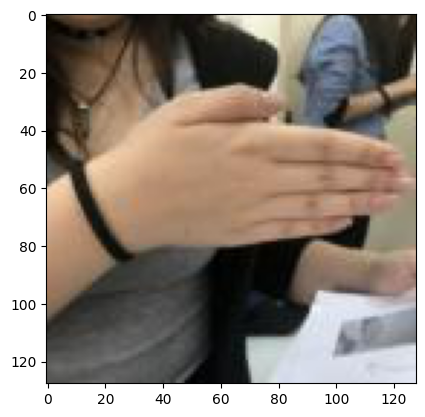

In [ ]:
# Printing the first available image in the dataset
plt.imshow(X[0])
plt.show()

From the previous printing, it looks like the color chanels are in the correct order (This was not explicitly stated in the paper).
But, what happens when the chanels are by any chance inverted? **How does that affect the images?**

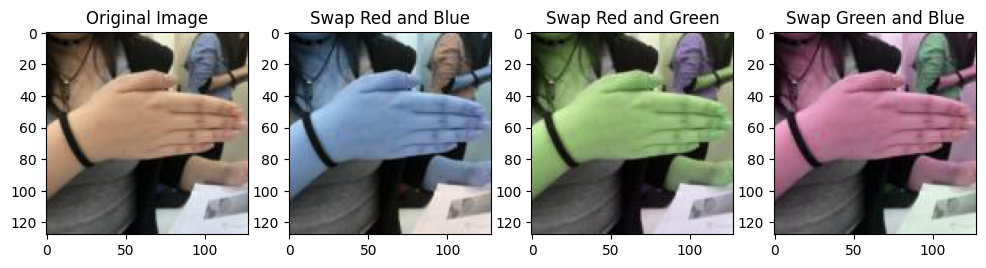

In [ ]:
# To swap Red and Blue channels:
swap_1 = X[0][:, :, [2, 1, 0]]

# To swap Red and Green channels:
swap_2 = X[0][:, :, [1, 0, 2]]

# To swap Green and Blue channels:
swap_3 = X[0][:, :, [0, 2, 1]]

fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,6))

axs[0].imshow(X[0])
axs[0].set_title("Original Image")

axs[1].imshow(swap_1)
axs[1].set_title("Swap Red and Blue")

axs[2].imshow(swap_2)
axs[2].set_title("Swap Red and Green")

axs[3].imshow(swap_3)
axs[3].set_title("Swap Green and Blue")

plt.show()

We can see that an alteration in the correct order of the color chanels affects in a pretty evident way the quality of the printed images (color-wise).

Thus, it is also good to check whether the color chanels are in the correct order.

### We are going to randomly visualize some images:

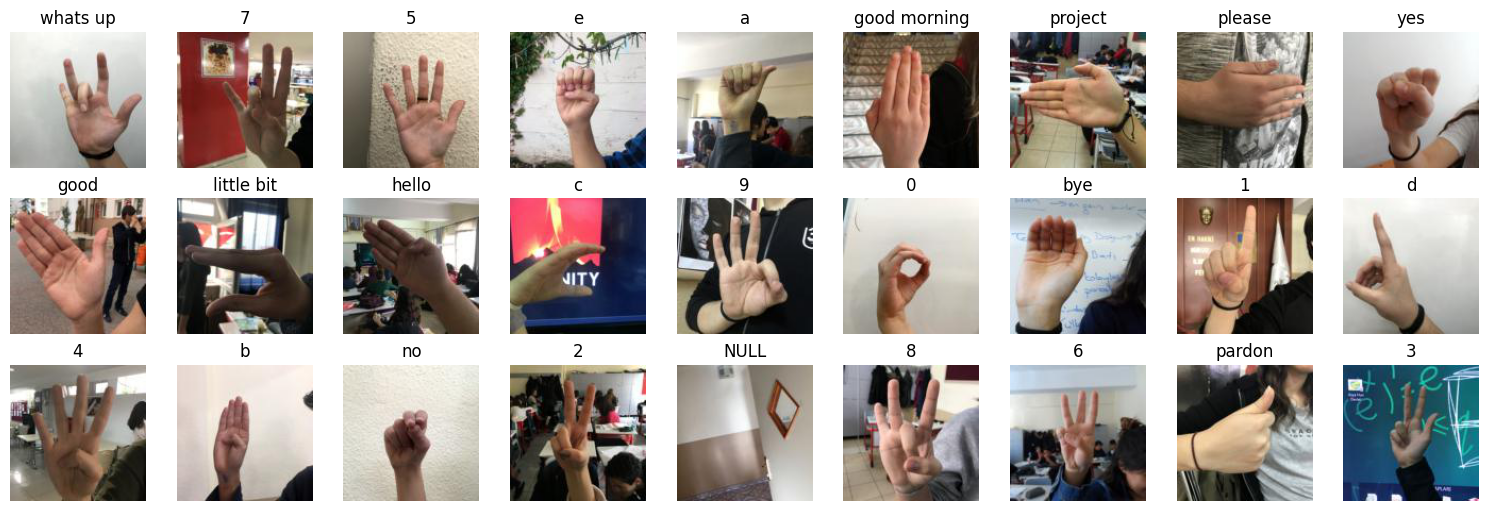

In [ ]:
row = 3
col = 9
fig, axs = plt.subplots(nrows = row, ncols = col, figsize = (15,5), layout = 'constrained')

data_labels = list(set(y.reshape(-1)))
counter = 0
for i in range(0,row):
    for j in range(0,col):
            plot_label = data_labels[counter]
            aux = labels_df[labels_df['label'] == plot_label]
            random_index = random.choice(list(list(aux.index)))
            axs[i,j].set_title(f'{plot_label}')
            axs[i,j].imshow(X[random_index])
            axs[i,j].axis('off')
            counter += 1


Here we see a random image printed for each of the categories. We can already see some images that might generate future confusion to any possible model, such as the categories "1" and "d" (here an image taken before, in case the previous block of code was ran again).

![image-2.png](attachment:image-2.png)

Another set of images that can potentially generate troubles are the following:

![image.png](attachment:image.png)![image-3.png](attachment:image-3.png)

![image-4.png](attachment:image-4.png)![image-5.png](attachment:image-5.png)

Something that usually is made during the fitting of any sort of model, specifically when the go-to is a Neural Network, is the *Data Augmentation*, that is, modifying the existing images with expansions, flipings, rotations, blurrying, etc., in order to have even more images to work with.

In this particular case, eventhough there are possible augmentations that can be carried out (i.e. traslation, shearing, blurrying, zooming, etc.), we must be carefull with the *rotation* options, as they might give incorrect impressions during training to the model.